In [166]:
import numpy as np
import math

In [167]:
def sigmoid(x):
    return (1/(1+math.e**(-x)))


In [168]:
def sigmoidprime(x):
    return ((math.e**(-x))/(1+math.e**(-x))**2)

In [169]:
# To make sure that you get the implementation right let us first have a look at the data structure.
# These are the four possible input pairs of (x1,x2).
x = np.array([[0,0],[0,1],[1,0],[1,1]])

# These are possible labels for all logical gates/tasks.
tasks = {
    "t_and" : np.array([0,0,0,1]),
    "t_or" : np.array([0,1,1,1]),
    "t_nand" : np.array([1,1,1,0]),
    "t_nor" : np.array([1,0,0,0]),
    "t_xor" : np.array([0,1,1,0])
}

In [170]:
class Perceptron:
    
    def __init__(self, input_units):
        self.input_units = input_units
        # 1. Initialize random weights and a random bias term. Check 'np.random.randn()'.
        self.weights = np.random.randn(input_units)
        self.bias = np.random.randn()
        # 2. Define the learning rate as 1
        self.alpha = 1
        #store drive of neuron
        self.weighted_sum = 0
        
    def forward_step(self, input):
        # Perform a perceptron forward step.
        # 1. Calculate the drive. You can use @ as a matrix multiplication command.
        #self.weights @ input
        self.weighted_sum = np.dot(input, self.weights)  + self.bias 

        # 2. Return activation of Perceptron, depending on whether the perceptron surpassed the threshold. 
        if self.weighted_sum > 0:
            return sigmoid(self.weighted_sum)
        else:
            return 0
        
    
    def update(self, delta):
        self.bias = self.bias - (self.alpha * delta)
        self.weights = self.weights - (self.alpha * delta * sigmoid(self.weighted_sum))
        
        
    

In [171]:
class MLP:
    
    def __init__(self):
        #Create array with 4 Perceptrons (hidden layer)
        self.perceptrons = np.array([Perceptron(2), Perceptron(2), Perceptron(2), Perceptron(2)])
        #Create the one read-out Perceptron
        self.readout_perceptron = Perceptron(4)
        #output of MLP
        self.output = 0.0
        
        #Storage of values about MLP, loss and accuracy
        accuracy = []
        loss = []
    
    def forward_step(self, sample):
        #Store if Perceptron fires or not, if drive gets above threshold
        self.activation = np.empty(4)
        #Processing drive for every Perceptron in hidden layer (self.perceptrons)
        for i in range(4):
            self.activation[i] = self.perceptrons[i].forward_step(sample)
        #Storing output of network
        self.output = self.readout_perceptron.forward_step(self.activation)
      
        return 
        
        
    def backprop_step(self, label):
                
        #delta calculation for read_out Perceptron
        # -(target-activation)*sigmoid'(drive) for l=N (output layer)
        readout_perceptron_delta = (-(label - self.output)) * sigmoidprime(self.readout_perceptron.weighted_sum)
        #delta calculation for hidden layer Perceptrons
        delta = np.empty(4)
        for i in range(4):
            # (sum irrelevant because in this case there is just one perceptron in subsequent layer)
            # delta(l+1)*weight(i)(l+1)*sigmoidprime(drive(l))
            delta[i] = readout_perceptron_delta * self.readout_perceptron.weights[i] * sigmoidprime(self.perceptrons[i].weighted_sum)
        
        #calling for updating weights and bias
        #1. update output layer
        self.readout_perceptron.update(readout_perceptron_delta)
        #2. update hidden layer
        for i in range(4):
            self.perceptrons[i].update(delta[i])

    
        
    def training_step(self, input_index, task_label):
        #current sample
        sample = x[input_index]
        #current label for this specific sample
        label = task_label[input_index]
                
        #Forward step mit input-Wert array e.g. [0,1]
        self.forward_step(sample)
        #Backpropagation step with label for this input, 1 or 0
        self.backprop_step(label)
        
        #Calculate loss and accuracy measurements for this specific trial
        #loss calculation
        single_loss = (label - self.output)**2
        #accuracy calculation
        if abs((label - self.output)) < 0.5:
            single_accuracy = 1
        else:
            single_accuracy = 0
            
        #returning both measurements for further, broader calculations
        return np.array([single_loss, single_accuracy])
        
        
        
        
            
        

In [172]:
#Storage of epochs already done, mean accuracy and mean loss epochs = []
accuracy = []
loss = []

task_choice = np.array(["t_and", "t_or", "t_nand", "t_nor", "t_xor"])
#Create MLP for 
MLP1 = MLP()
#repeat course for 1000 epochs
for i in range(1000):
    #repeat for every task option
    for j in task_choice:
        #array with labels for each possible sample for this task
        task_label = tasks[j]
        #execute training for every possible data set in every task option
        for k in range(4):
            input_index = k
            #Do one training step, get for this task and sample individual loss and accuary measurements
            single_measurements = MLP1.training_step(input_index, task_label)
            
            #Sum up loss and accuracy measurements over one epoch (20 trials because 5 task of each 4 samples)
            loss_sum = loss_sum + single_measurements[0]
            accuracy_sum = accuracy_sum + single_measurements[1]
    
    #Calculate mean accuracy for this epoch and add it to accuracy list for visualization
    accuracy.append((accuracy_sum / 20))
    #Calculate mean loss for this epoch and add it to loss list for visualization
    loss.append((loss_sum/20))
    
    #reset loss and accuracy count for one epoch
    loss_sum = 0
    accuracy_sum = 0

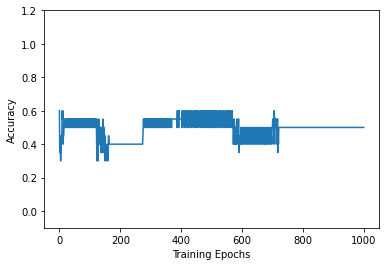

In [173]:
#Plot accuracy over epochs
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(1000), accuracy)
plt.xlabel("Training Epochs")
plt.ylabel("Accuracy")
plt.ylim([-0.1, 1.2])
plt.show()

In [174]:
print(accuracy)

[0.6, 0.35, 0.45, 0.4, 0.3, 0.35, 0.4, 0.45, 0.45, 0.6, 0.55, 0.6, 0.4, 0.45, 0.45, 0.5, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.5, 0.55, 0.4, 0.3, 0.55, 0.5, 0.5, 0.3, 0.45, 0.55, 0.4, 0.45, 0.4, 0.5, 0.45, 0.5, 0.35, 0.5, 0.35, 0.5, 0.5, 0.35, 0.4, 0.55, 0.35, 0.4, 0.5, 0.4, 0.4, 0.3, 0.45, 0.35, 0.4, 0.35, 0.3, 0.35, 0.35, 0.4, 0.35, 0.3, 0.35, 0.45, 0.45, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,

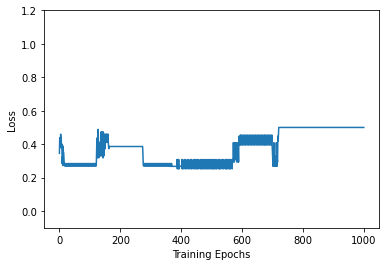

In [175]:
#Plot loss over epochs
plt.figure()
plt.plot(range(1000), loss)
plt.xlabel("Training Epochs")
plt.ylabel("Loss")
plt.ylim([-0.1, 1.2])
plt.show()

In [176]:
print(loss)

[0.3451492837762292, 0.43775639624151086, 0.3785603260421425, 0.3947423410003548, 0.4598206580237453, 0.4382826122408286, 0.4272135268616194, 0.38050618320699936, 0.39962955790580773, 0.2837062578232505, 0.32416860969557454, 0.2717640651751851, 0.3884024060518272, 0.35305878550086545, 0.3495637094985748, 0.3087566774334612, 0.2843385406655766, 0.2703401171157481, 0.2841623515157813, 0.27030901373932636, 0.2841377469453062, 0.2703046562351803, 0.2841342696995301, 0.27030404012006615, 0.28413377743189155, 0.2703039528918767, 0.28413370772541724, 0.2703039405400039, 0.2841336978544444, 0.2703039387908813, 0.28413369645663183, 0.2703039385431909, 0.28413369625868984, 0.27030393850811585, 0.28413369623065954, 0.2703039385031488, 0.28413369622669027, 0.2703039385024455, 0.2841336962261281, 0.27030393850234596, 0.2841336962260485, 0.2703039385023318, 0.2841336962260373, 0.27030393850232987, 0.2841336962260357, 0.27030393850232953, 0.28413369622603546, 0.2703039385023295, 0.2841336962260355, 0